## Ejercicio: Grafo de rutas entre ciudades

### Nombre

Alberto Falconi

### Fecha

29/05/2025

### Enunciado

Una empresa de transporte desea modelar un sistema de rutas entre ciudades para estimar los costos de viaje. El grafo se compone de las siguientes ciudades:

- Quito
- Ambato
- Riobamba
- Cuenca

Y las rutas con sus respectivos costos (en USD):

- Quito → Ambato: 10
- Quito → Riobamba: 18
- Ambato → Cuenca: 25
- Riobamba → Cuenca: 20

### Objetivo del estudiante

1. Crear un grafo dirigido y ponderado con `networkx`.
2. Representar el grafo visualmente.
3. Mostrar los pesos de las rutas.
4. Determinar el **camino más barato** entre Quito y Cuenca usando un algoritmo como `shortest_path` o `dijkstra_path`.


		Grado de cada nodo
Quito: entrada = 0, salida = 2
Ambato: entrada = 1, salida = 1
Riobamba: entrada = 1, salida = 1
Cuenca: entrada = 2, salida = 0

		Listado de pesos de todas las aristas:
Quito → Ambato: peso = 10
Quito → Riobamba: peso = 18
Ambato → Cuenca: peso = 25
Riobamba → Cuenca: peso = 20

		Dibujando el grafo...


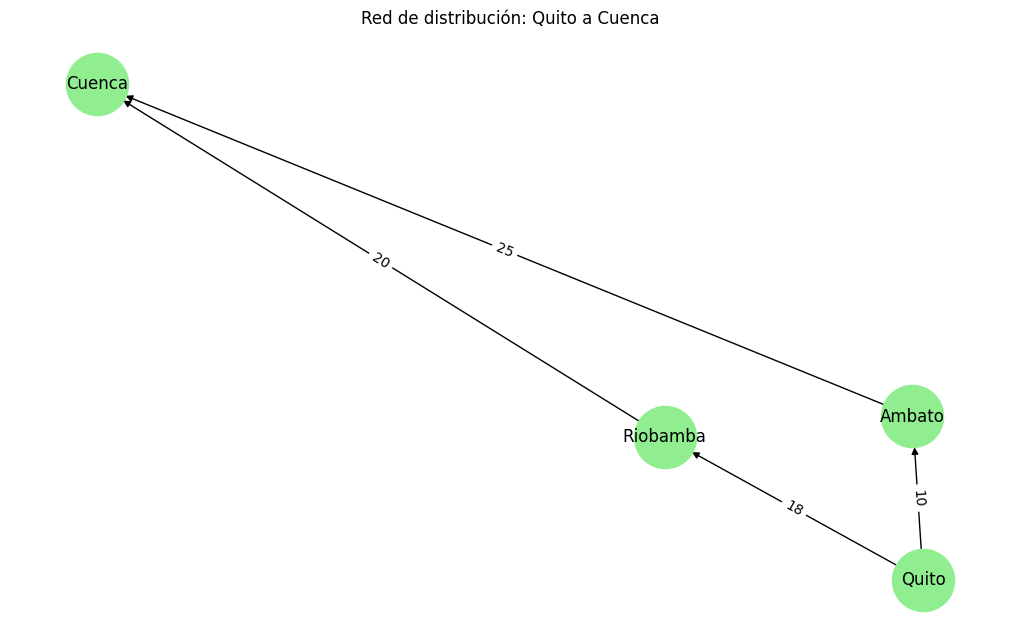

		Resultados
Camino más barato de Quito a Cuenca: ['Quito', 'Ambato', 'Cuenca']
Costo total del viaje: $ 35


In [12]:
# Importamos las librerías necesarias
import networkx as nx
import matplotlib.pyplot as plt

# Creamos el grafo dirigido
G = nx.DiGraph()

# Añadimos los nodos que representan las ciudades
ciudades = ['Quito', 'Ambato', 'Riobamba', 'Cuenca']
G.add_nodes_from(ciudades)

# ====================================
# 📌 ARISTA y ARISTA DIRIGIDA
# Las conexiones tienen dirección y peso
# ====================================
G.add_weighted_edges_from([
    ('Quito', 'Ambato', 10), # Quito a Ambato con peso 10
    ('Quito', 'Riobamba', 18), # Quito a Riobamba con peso 18
    ('Ambato', 'Cuenca', 25), # Ambato a Cuenca con peso 25
    ('Riobamba', 'Cuenca', 20) # Riobamba a Cuenca con peso 20
])

# ====================================
# 📌 GRADO de cada nodo
# in_degree: entradas | out_degree: salidas
# ====================================
print("\t\tGrado de cada nodo")
for nodo in G.nodes:
    print(f"{nodo}: entrada = {G.in_degree(nodo)}, salida = {G.out_degree(nodo)}")


# Añadimos las aristas junto con sus respectivos pesos
G.add_edge('Quito', 'Ambato', weight=10) 
G.add_edge('Quito', 'Riobamba', weight=18)
G.add_edge('Ambato', 'Cuenca', weight=25)
G.add_edge('Riobamba', 'Cuenca', weight=20)

# Definimos la posición de los nodos usando un layout automático
pos = nx.spring_layout(G, seed=42)

# 🔁 Iterar sobre todas las aristas y mostrar sus pesos
print("\n\t\tListado de pesos de todas las aristas:")
for u, v, datos in G.edges(data=True):
    print(f"{u} → {v}: peso = {datos['weight']}")

# Calculamos el grado de cada nodo


# Dibujamos el grafo
print("\n\t\tDibujando el grafo...")
plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=2000, font_size=12, arrows=True)

# Mostramos los pesos sobre las aristas
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

# Título del gráfico
plt.title("Red de distribución: Quito a Cuenca")
plt.axis('off')
plt.show()

# 🧠 Encontramos el camino más barato y su costo total usando Dijkstra
camino = nx.dijkstra_path(G, source='Quito', target='Cuenca')
costo = nx.dijkstra_path_length(G, source='Quito', target='Cuenca')

# Mostramos resultados
print("\t\tResultados")
print("Camino más barato de Quito a Cuenca:", camino)
print("Costo total del viaje: $", costo)


## Explicación del contexto del modelo

Una familia de Quito desea visitar a sus familiares en Cuenca, por lo que desean aplicar una herramienta digital que les permita identificar la mejor ruta para llegar a su destino de forma eficiente y económica. Al tener varias opciones de paso por ciudades intermedias como Ambato y Riobamba, buscan no solo conocer las posibles rutas, sino también cuál representa el menor costo total de viaje.

El código presentado hace uso de la biblioteca NetworkX para modelar esta situación como un grafo dirigido, donde cada nodo representa una ciudad (Quito, Ambato, Riobamba, Cuenca) y cada arista indica una posible conexión entre ellas con un peso asociado, que en este contexto representa el costo del trayecto (en dólares u otra unidad equivalente).

- Primero, se definen los nodos (ciudades) y las conexiones con dirección y peso.

- Luego, se imprime el grado de entrada y salida de cada ciudad para identificar qué tan conectadas están.

- Se listan todas las aristas del grafo junto con sus pesos.

- Posteriormente, se genera un grafo visual usando matplotlib, donde las conexiones están etiquetadas con sus respectivos costos.

- Finalmente, se aplica el algoritmo de Dijkstra, una técnica clásica para encontrar el camino más corto en grafos ponderados, determinando así cuál es la ruta más económica desde Quito hasta Cuenca, así como su costo total.

Con este código se desea modelar y resolver de forma visual y analítica el problema de planificación de ruta entre ciudades, permitiendo tomar decisiones informadas sobre el trayecto más conveniente para el viaje familiar desde Quito hasta Cuenca.


### Rúbrica de Evaluación (sobre 100 puntos)

| Criterio                                              | Puntaje |
| ----------------------------------------------------- | ------- |
| Creación correcta del grafo dirigido                  | 20 pts  |
| Asignación correcta de pesos a las aristas            | 20 pts  |
| Visualización clara y ordenada del grafo              | 20 pts  |
| Correcta obtención del camino más corto               | 20 pts  |
| Comentarios y claridad del código                     | 10 pts  |
| Explicación del contexto del modelo (aplicación real) | 10 pts  |
| **Total**                                             | **100** |
